# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aelri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [26]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [37]:
# Fetch the Bitcoin news articles
bitcoin_headline = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_headline["articles"][0]

{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'Bitcoin hits strongest level since May',
 'description': '<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li></ul>Bitcoin hit its highest level since mid-May on Wednesda…',
 'url': 'https://techncruncher.blogspot.com/2021/10/bitcoin-hits-strongest-level-since-may.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEhiFZua2TKlWOHoZ5qipQ8zBVpSMbXNdxOFJmwNkddvji4GqJRO4SonCCmwV_IBrxtHCb2UlJ850RuZPY75s54QZkedzrYthaQqoo4tuOD3zUbMhTGxJ2T-rFtSu8I1vRJY9RtH8dWw7_5XtGfoeUvJuAWZU-U9XLsHKTKffBSWD6G9su34rjkO0sYD-w=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-10-06T17:17:00Z',
 'content': '<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0<

In [35]:
# Fetch the Ethereum news articles
ethereum_headline = newsapi.get_everything(q="Ethereum", language="en")
ethereum_headline["articles"][0]

{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
 'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
 'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-10-16T18:50:00Z',
 'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other pub

In [40]:
# Create the Bitcoin sentiment scores DataFrame
btc_df= pd.DataFrame.from_dict(bitcoin_headline["articles"])
btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Bitcoin hits strongest level since May,"<ul><li>Bitcoin, in terms of market value, ros...",https://techncruncher.blogspot.com/2021/10/bit...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-06T17:17:00Z,"<ul><li>Bitcoin, in terms of market value, ros..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,A fake press release claiming Kroger accepts c...,A crypto hoax claimed Kroger is accepting Bitc...,https://www.theverge.com/2021/11/5/22765098/kr...,https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--m...,2021-11-05T13:32:14Z,A similar hoax earlier this year tied Walmart ...
2,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),"BTC, DOGE, and SHIBA Price Analysis for October 6",How high are the chances of Bitcoin sustaining...,https://techncruncher.blogspot.com/2021/10/btc...,None,2021-10-06T19:49:00Z,How high are the chances of Bitcoin sustaining...
3,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),"Who Bought $1.6B in Bitcoin Wednesday, and Why?",last week the cryptocurrency market persistent...,https://techncruncher.blogspot.com/2021/10/who...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-10T20:12:00Z,"Specifically, why did someone make a massive p..."
4,"{'id': None, 'name': 'Gizmodo.com'}",Molly Taft,Bitcoin Miners Are Gobbling Up U.S. Energy,There’s a big new presence slurping up power f...,https://gizmodo.com/bitcoin-miners-are-gobblin...,https://i.kinja-img.com/gawker-media/image/upl...,2021-10-28T16:45:00Z,Theres a big new presence slurping up power fr...


In [41]:
# Create the Ethereum sentiment scores DataFrame
eth_df= pd.DataFrame.from_dict(ethereum_headline["articles"])
eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Blogspot.com'}",noreply@blogger.com (Unknown),Nervos launches cross-chain bridge to connect ...,A new cross-chain bridge is currently connecte...,https://techncruncher.blogspot.com/2021/10/ner...,https://blogger.googleusercontent.com/img/a/AV...,2021-10-16T18:50:00Z,A new cross-chain bridge is currently connecte...
1,"{'id': None, 'name': 'Entrepreneur'}",Entrepreneur Staff,"Mark Cuban Heralds Ethereum, Bitcoin",Mark Cuban has some advice for people who are ...,https://www.entrepreneur.com/article/391242,https://assets.entrepreneur.com/content/3x2/20...,2021-10-14T17:10:45Z,Mark Cuban has some advice for people who are ...
2,"{'id': 'business-insider', 'name': 'Business I...",hrobertson@businessinsider.com (Harry Robertson),JPMorgan says ethereum is a better bet than bi...,Ethereum is the more resilient cryptocurrency ...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-05T12:06:22Z,Ethereum and bitcoin are the two biggest crypt...
3,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),A meme coin named after Elon Musk rode the wav...,The surge in October pushed the ethereum-based...,https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-01T16:35:14Z,Elon Musk\r\npicture alliance / Getty Images\r...
4,"{'id': 'business-insider', 'name': 'Business I...",ilee@insider.com (Isabelle Lee),Obscure altcoin mana spikes 400% as Facebook's...,"The price of Decentraland, whose ticker is man...",https://markets.businessinsider.com/news/curre...,https://images2.markets.businessinsider.com/61...,2021-11-01T15:34:40Z,Cryptocurrency and business continuity line im...


In [45]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments = []

for article in bitcoin_headline["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = btc_df[cols]

bitcoin_df.describe()


,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.258495,0.075000,0.003150,0.921850
std,0.294239,0.076982,0.014087,0.075015
min,-0.273200,0.000000,0.000000,0.781000
25%,0.000000,0.000000,0.000000,0.874250
50%,0.318000,0.070000,0.000000,0.930000
75%,0.502100,0.125750,0.000000,1.000000
max,0.755800,0.219000,0.063000,1.000000


In [47]:
# Describe the Ethereum Sentiment
ethereum_sentiments = []

for article in ethereum_headline["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = eth_df[cols]

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.206370,0.044350,0.002400,0.953250
std,0.297927,0.066664,0.010733,0.071224
min,0.000000,0.000000,0.000000,0.792000
25%,0.000000,0.000000,0.000000,0.905250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.475775,0.094750,0.000000,1.000000
max,0.822500,0.208000,0.048000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (0.075000)

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin(0.219000)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [49]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    return tokens

In [55]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
2,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781,"[high, chance, bitcoin, sustaining, gain, push..."
3,2021-10-10,"Specifically, why did someone make a massive p...",0.5461,0.121,0.000,0.879,"[specifically, someone, make, massive, purchas..."
4,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."


In [56]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

C:\Users\aelri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,text,compound,positive,negative,neutral,tokens
0,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
1,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.0,1.000,"[mark, cuban, ha, advice, people, new, investi..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [57]:
from collections import Counter
from nltk import ngrams

In [60]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('reuters', 'bitcoin'): 5, ('char', 'representation'): 4, ('cryptocurrency', 'bitcoin'): 4, ('illustration', 'taken'): 4, ('oct', 'reuters'): 4, ('securities', 'exchange'): 4, ('exchange', 'commission'): 4, ('exchangetraded', 'fund'): 4, ('representation', 'virtual'): 3, ('virtual', 'cryptocurrency'): 3}


In [59]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum= tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('illustration', 'taken'): 4, ('taken', 'june'): 4, ('bitcoin', 'ethereum'): 3, ('ethereum', 'dogecoin'): 3, ('crosschain', 'bridge'): 2, ('cryptocurrency', 'exchange'): 2, ('char', 'representations'): 2, ('representations', 'cryptocurrencies'): 2, ('cryptocurrencies', 'bitcoin'): 2, ('dogecoin', 'ripple'): 2}


In [61]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [62]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_10 = token_count(bitcoin)
bitcoin_10

[('bitcoin', 22), ('char', 18), ('us', 7)]

In [63]:
# Use token_count to get the top 10 words for Ethereum
ethereum_10 = token_count(ethereum)
ethereum_10

[('char', 20), ('ethereum', 12), ('bitcoin', 9)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

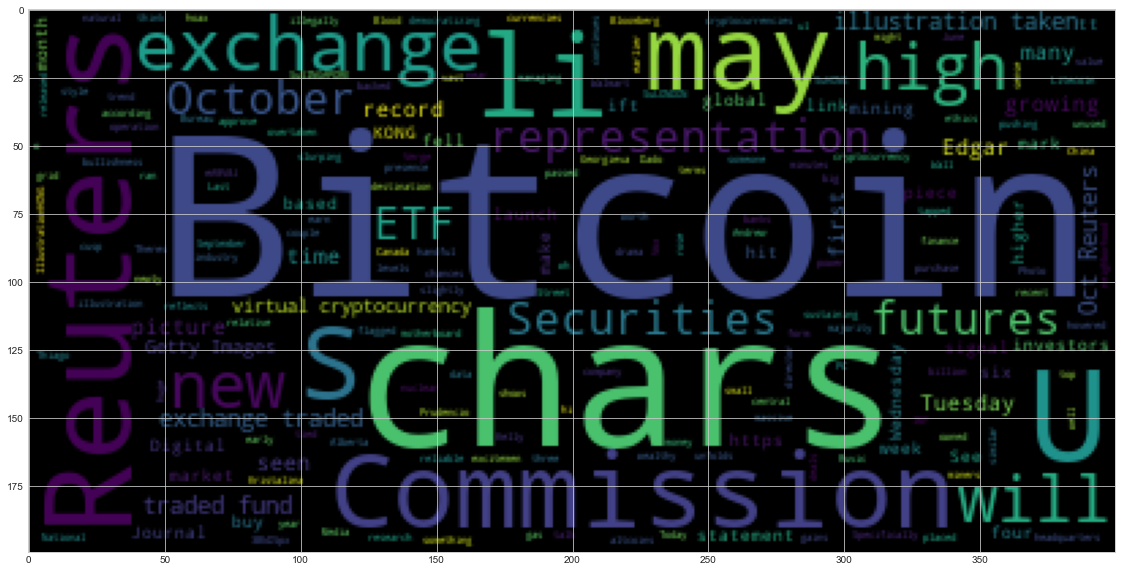

In [66]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

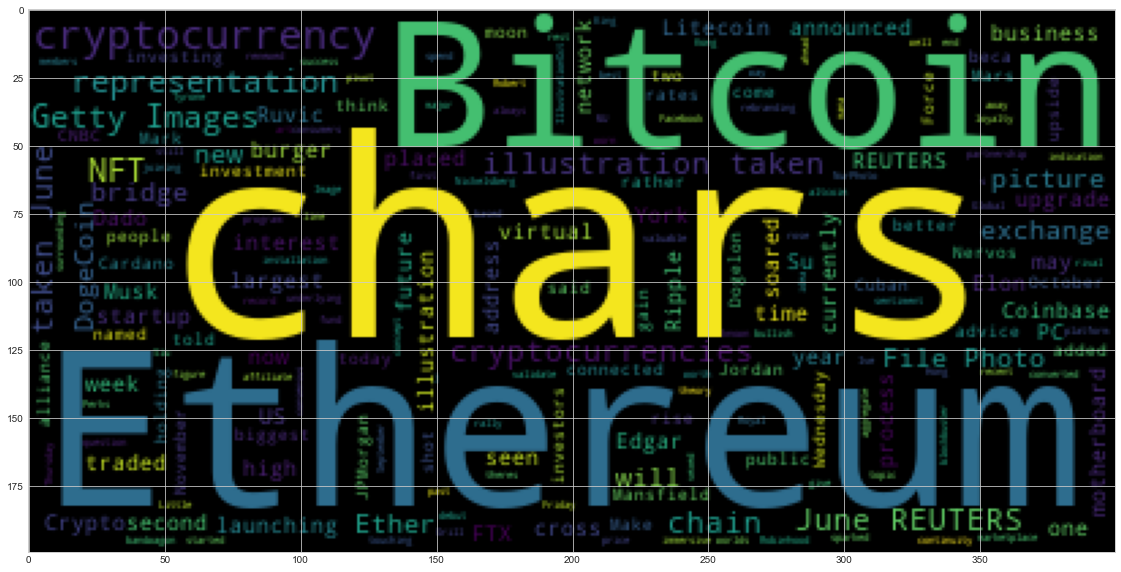

In [65]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [67]:
import spacy
from spacy import displacy

In [71]:
# Download the language model for SpaCy
#python -m spacy download en_core_web_sm

In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [72]:
# Concatenate all of the Bitcoin text together
bitcoin_txt = ' '.join(bitcoin_df.text)
bitcoin_txt

"<ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars] A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J Specifically, why did someone make a massive purchase of $1.6 billion worth of bitcoin on Wednesday in a couple of minutes?\r\nWhile many see this huge buy as a signal of bullishness, there may be more… [+8443 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+

In [73]:
# Run the NER processor on all of the text
bitcoin_ner= nlp(bitcoin_txt)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [74]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [78]:
# List all Entities
btc_entities = [ent.text for ent in bitcoin_ner.ents if ent.label_]
btc_entities = [i.lower().replace(' ', '_') for i in btc_entities]
btc_entities

['4.6%',
 '53,859.6.</li><li',
 '50,000',
 'first',
 'four_weeks',
 'tuesday',
 '50,000',
 'earlier_this_year',
 'verge',
 'vox_media',
 'thiago_prudencio/s',
 '$1.6_billion',
 'wednesday',
 'a_couple_of_minutes',
 'u.s.',
 'u.s.',
 'china',
 'last_week',
 'the_wall_street_journal',
 'three',
 'journal',
 'bitcoin',
 'bloomberg',
 'the_national_bureau',
 'digital',
 'imf',
 'kristalina_georgieva',
 'canada',
 'bitcoin',
 'alberta',
 'link_global',
 'june_29,_2021',
 'reuters',
 'dado_ruvic/illustrationhong_kong',
 'oct_21',
 'reuters',
 'october_19,_2021',
 'reuters',
 'edgar_sulondon',
 'oct_20',
 'reuters',
 'securities_and_exchange_commission',
 'andrew_kelly',
 'the_us_securities_and_exchange_commission',
 'as_many_as_four',
 'october',
 'october_18,_2021',
 'reuters',
 'edgar_susingapore',
 'oct_19',
 'reuters',
 'six-month',
 'october_19,_2021',
 'reuters',
 'edgar_suhong_kong',
 'oct_20',
 'reuters',
 'wednesday',
 'first',
 'u.s.',
 'conway_g._gittens',
 'reuters',
 'reuters',


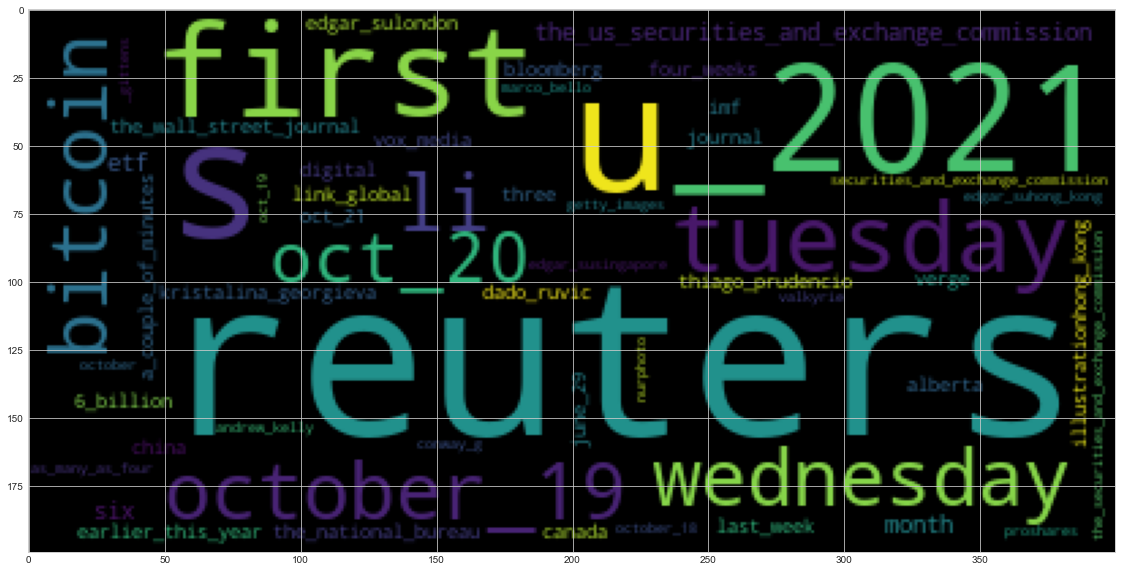

In [79]:
wc = WordCloud().generate(' '.join(btc_entities))
plt.imshow(wc)

---

### Ethereum NER

In [80]:
# Concatenate all of the Ethereum text together
ethereum_txt = ' '.join(ethereum_df.text)
ethereum_txt

'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana soare

In [81]:
# Run the NER processor on all of the text
ethereum_ner= nlp(ethereum_txt)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [83]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [84]:
# List all Entities
eth_entities = [ent.text for ent in ethereum_ner.ents if ent.label_]
eth_entities = [i.lower().replace(' ', '_') for i in eth_entities]
print(btc_entities)

['4.6%', '53,859.6.</li><li', '50,000', 'first', 'four_weeks', 'tuesday', '50,000', 'earlier_this_year', 'verge', 'vox_media', 'thiago_prudencio/s', '$1.6_billion', 'wednesday', 'a_couple_of_minutes', 'u.s.', 'u.s.', 'china', 'last_week', 'the_wall_street_journal', 'three', 'journal', 'bitcoin', 'bloomberg', 'the_national_bureau', 'digital', 'imf', 'kristalina_georgieva', 'canada', 'bitcoin', 'alberta', 'link_global', 'june_29,_2021', 'reuters', 'dado_ruvic/illustrationhong_kong', 'oct_21', 'reuters', 'october_19,_2021', 'reuters', 'edgar_sulondon', 'oct_20', 'reuters', 'securities_and_exchange_commission', 'andrew_kelly', 'the_us_securities_and_exchange_commission', 'as_many_as_four', 'october', 'october_18,_2021', 'reuters', 'edgar_susingapore', 'oct_19', 'reuters', 'six-month', 'october_19,_2021', 'reuters', 'edgar_suhong_kong', 'oct_20', 'reuters', 'wednesday', 'first', 'u.s.', 'conway_g._gittens', 'reuters', 'reuters', 'six-month', 'tuesday', 'u.s.', 'nurphoto', 'getty_images', 'f

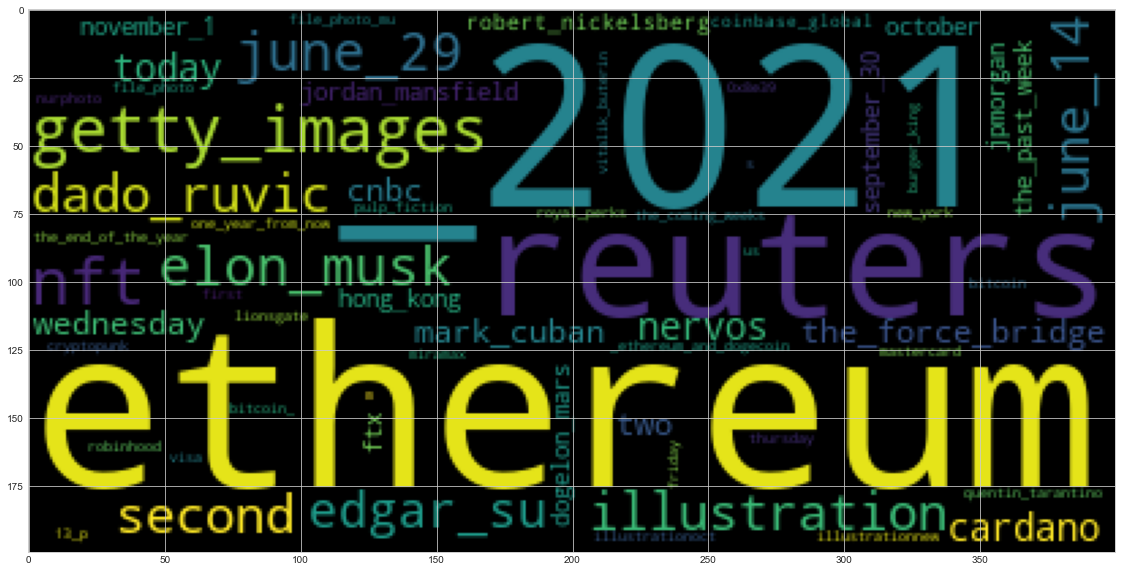

In [85]:
wc = WordCloud().generate(' '.join(eth_entities))
plt.imshow(wc)

---